Example of Time Series forecasting in Meta stock using ARIMA Model

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index 

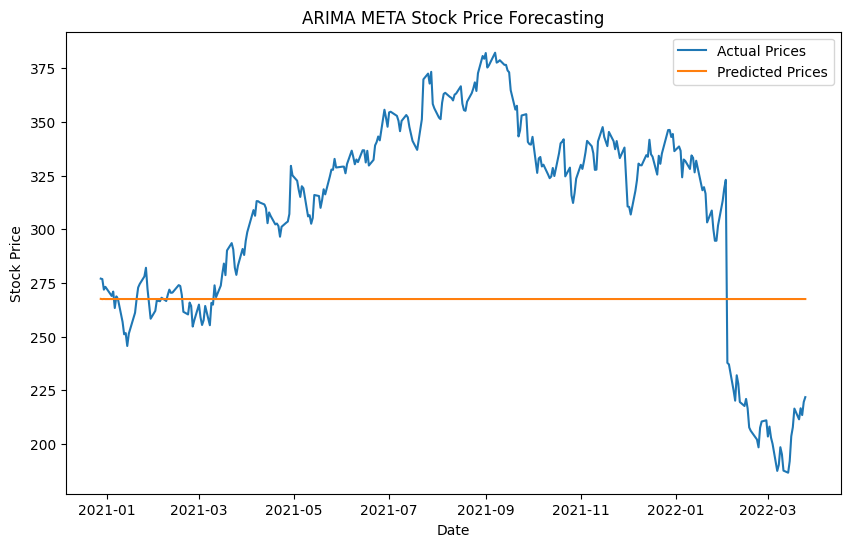

Mean Squared Error: 3884.618950300845


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import yfinance as yf

# Load your dataset (replace the ticker symbol with your stock of interest)
ticker = "META"
data = yf.download(ticker, start="2016-01-01", end="2022-03-27")

# Use the closing price for the ARIMA model
closing_prices = data["Close"]

# Split the data into train and test sets
train_data = closing_prices[:int(0.8 * len(closing_prices))]
test_data = closing_prices[int(0.8 * len(closing_prices)):]

# Fit the ARIMA model (p, d, q) - you may need to find the optimal values for your dataset
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Make predictions on the test set
predictions = model_fit.forecast(steps=len(test_data))

# Calculate the mean squared error
mse = mean_squared_error(test_data, predictions)

# Plot the predictions against the actual values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label="Actual Prices")
plt.plot(test_data.index, predictions, label="Predicted Prices")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title(f"ARIMA {ticker} Stock Price Forecasting")
plt.show()

print("Mean Squared Error:", mse)



**Example of using Random Forests to determine price movement**

In [3]:

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Download historical stock data
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2010-01-01', end='2021-09-30')

# Compute technical indicators for trading signals
stock_data['SMA'] = stock_data['Close'].rolling(window=14).mean()
stock_data['EMA'] = stock_data['Close'].ewm(span=14, adjust=False).mean()
stock_data.dropna(inplace=True)

# Define target variable (price increase or decrease)
stock_data['Target'] = np.where(stock_data['Close'].shift(-1) > stock_data['Close'], 1, 0)

# Prepare data for training and testing
X = stock_data[['SMA', 'EMA']]
y = stock_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and calculate accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy of the Random Forest model: {accuracy:.2f}')

[*********************100%%**********************]  1 of 1 completed


Accuracy of the Random Forest model: 0.46


**Example of using Topic Modeling**

In [4]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Sample financial news headlines
headlines = [
    "Company X reports better-than-expected earnings for Q3",
    "Company Y struggles with supply chain issues amid global crisis",
    "Company Z announces a major acquisition to expand market share",
]

# Preprocessing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

def preprocess(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

# Tokenize and preprocess the headlines
tokenized_headlines = [preprocess(headline) for headline in headlines]

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_headlines)
corpus = [dictionary.doc2bow(headline) for headline in tokenized_headlines]

# Train LDA model
num_topics = 2
lda_model = models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=20)

# Print topics
topics = lda_model.print_topics()
for topic in topics:
    print(topic)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


(0, '0.088*"company" + 0.088*"market" + 0.088*"share" + 0.088*"acquisition" + 0.088*"expand" + 0.088*"z" + 0.088*"announces" + 0.088*"major" + 0.030*"x" + 0.030*"report"')
(1, '0.119*"company" + 0.071*"global" + 0.071*"struggle" + 0.071*"crisis" + 0.071*"amid" + 0.071*"supply" + 0.071*"chain" + 0.071*"issue" + 0.071*"earnings" + 0.071*"report"')
